In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.rename(columns= {'Delivery Time' : 'Delivery_time', 'Sorting Time' : 'Sorting_time'},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

In [6]:
df.shape

(21, 2)

In [7]:
df.describe()

,Delivery_time,Sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

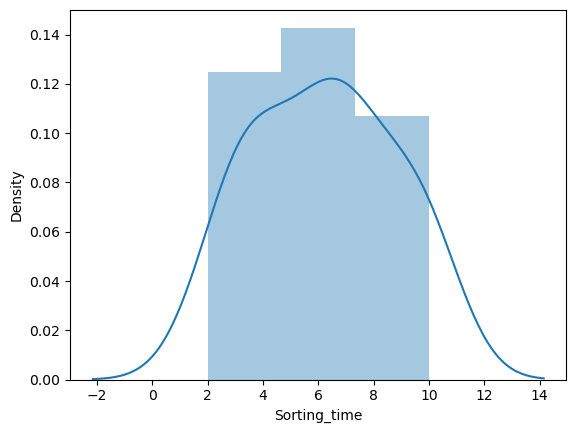

In [8]:
sns.distplot(df['Sorting_time'])


In [9]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<AxesSubplot:>

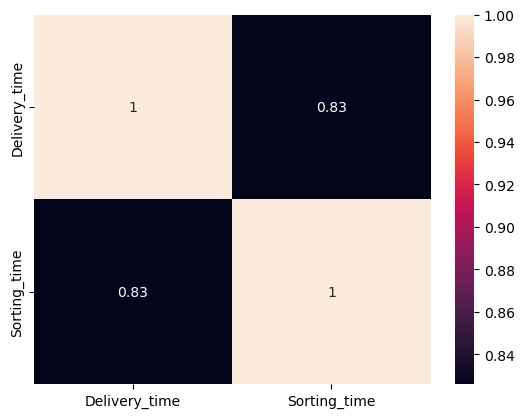

In [10]:
sns.heatmap(df.corr(),annot= True)

<AxesSubplot:xlabel='Delivery_time', ylabel='Sorting_time'>

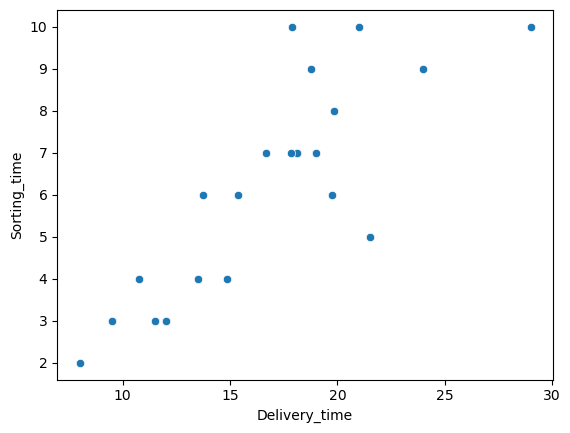

In [11]:
sns.scatterplot(df['Delivery_time'],df['Sorting_time'])

In [12]:
import statsmodels.formula.api as smf

In [13]:
df.columns

Index(['Delivery_time', 'Sorting_time'], dtype='object')

In [14]:
model = smf.ols('Delivery_time~Sorting_time', data= df).fit()

In [15]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [16]:
print(model.tvalues)


Intercept       3.823349
Sorting_time    6.387447
dtype: float64


In [17]:
print(model.pvalues)


Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [18]:
print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


# Model Preddiction

In [19]:
delivery_time = (6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [21]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [22]:
data_pred = pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,8


In [23]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64